In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

In [18]:
os.chdir("C:\\Users\\Rubén\\Documents\\DATA ANALIST\\git\\TareasEBACmx\\Practica m45")
df = pd.read_csv("CC_GENERAL.csv")

In [19]:
df.sample(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3913,C14023,113.629276,0.272727,798.00,798.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5000.0,4372.014696,84.491283,0.0,12
2450,C12524,2856.168150,1.000000,29.50,29.50,0.00,103.141056,0.100000,0.100000,0.000000,0.300000,4,1,3000.0,508.056466,1267.375870,0.0,10
1575,C11628,5805.320790,1.000000,1724.75,1638.97,85.78,1878.058967,0.833333,0.750000,0.666667,0.083333,1,29,7500.0,1351.901655,1419.470367,0.0,12


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [22]:
df = df.drop_duplicates()
# rellenar nulos numéricos con mediana
num_cols = df.select_dtypes(include='number').columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
# crear ratio ejemplo
if 'BALANCE' in df.columns and 'CREDIT_LIMIT' in df.columns:
    df['ratio_balance_limit'] = df['BALANCE'] / df['CREDIT_LIMIT'].replace(0, np.nan)
    df['ratio_balance_limit'] = df['ratio_balance_limit'].fillna(0)


In [23]:
for c in ['CASH_ADVANCE','PURCHASES']:
    if c in df.columns:
        df[c+'_log'] = np.log1p(df[c])


In [24]:
features = ['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT','ratio_balance_limit']
features = [f for f in features if f in df.columns]
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
inertia=[]; sil=[]
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, km.labels_))
# plot de inertia y silhouette


In [26]:
k_opt = 3  # ejemplo
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=20).fit(X_scaled)
df['cluster'] = kmeans.labels_
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids, columns=features)


cluster                         0            1            2
BALANCE               5357.145608   431.741596  1983.310558
PURCHASES             2830.080252   915.442427   468.170882
CASH_ADVANCE          3998.599989   275.176026   993.426218
PAYMENTS              5734.390516  1220.915043  1076.262284
CREDIT_LIMIT         10195.327829  4283.503707  2723.091434
ratio_balance_limit      0.552909     0.109121     0.778356
cluster
0    1112
1    4834
2    3004
dtype: int64


<Axes: >

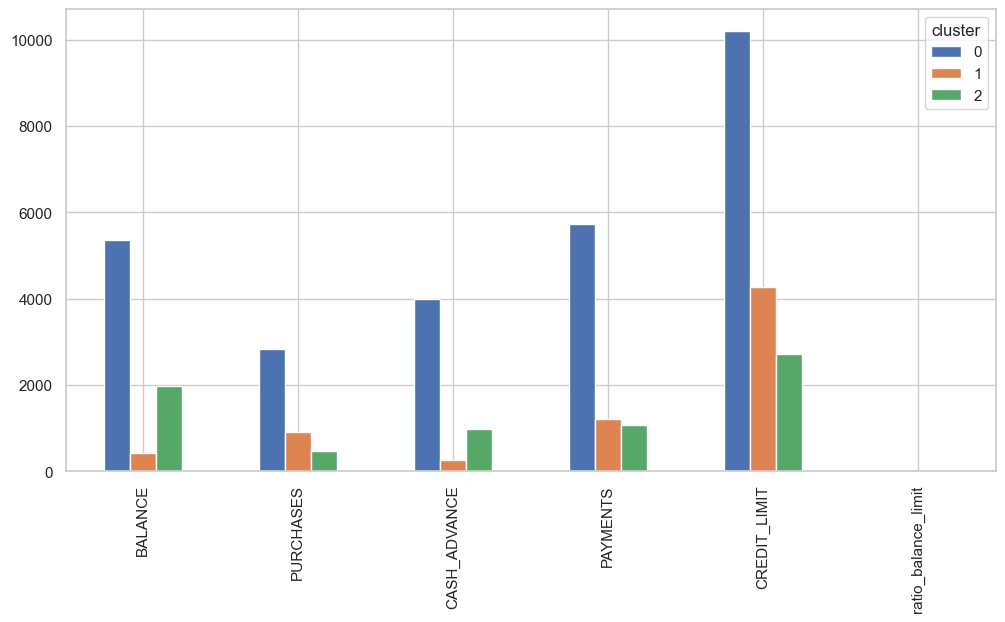

In [27]:
profile_mean = df.groupby('cluster')[features].mean().T
profile_count = df.groupby('cluster').size()
print(profile_mean); print(profile_count)
profile_mean.plot(kind='bar', figsize=(12,6))


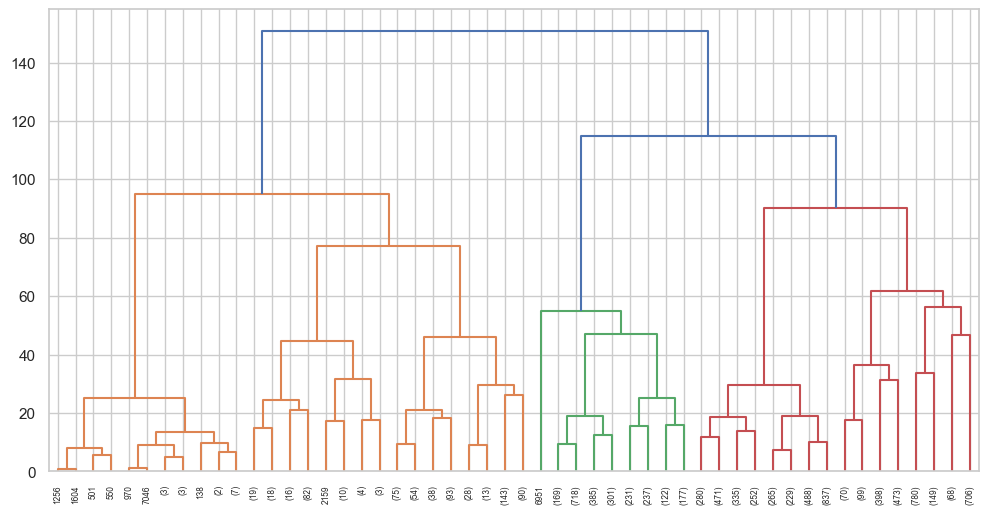

In [28]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6)); dendrogram(linked, truncate_mode='level', p=5); plt.show()


Text(0.5, 1.0, 'Clusters (PCA 2D)')

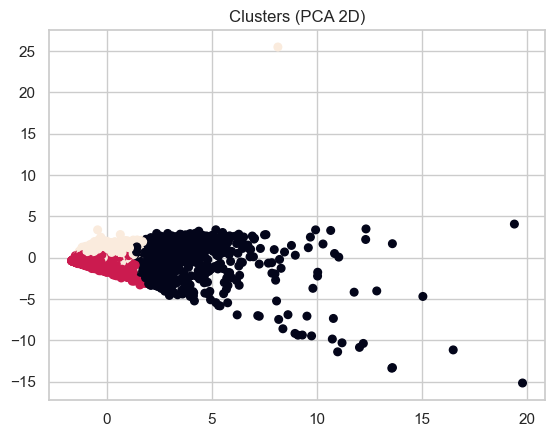

In [29]:
pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(pca[:,0], pca[:,1], c=df['cluster'], s=30)
plt.title('Clusters (PCA 2D)')
